### Importation de library

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.stats import shapiro
import missingno as msno
from sklearn.impute import SimpleImputer

### Chargement de donnée 

In [22]:
df = pd.read_csv("C:/Users/Mr CISSE/Desktop/CB/archive (2)/creditcard_2023.csv")

### Analyse descriptive

In [3]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [51]:
# Changer d'index
df = df.reset_index()

In [52]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [11]:
df.shape

(568630, 30)

In [49]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [7]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### analyse des valeurs manquantes 

<Axes: >

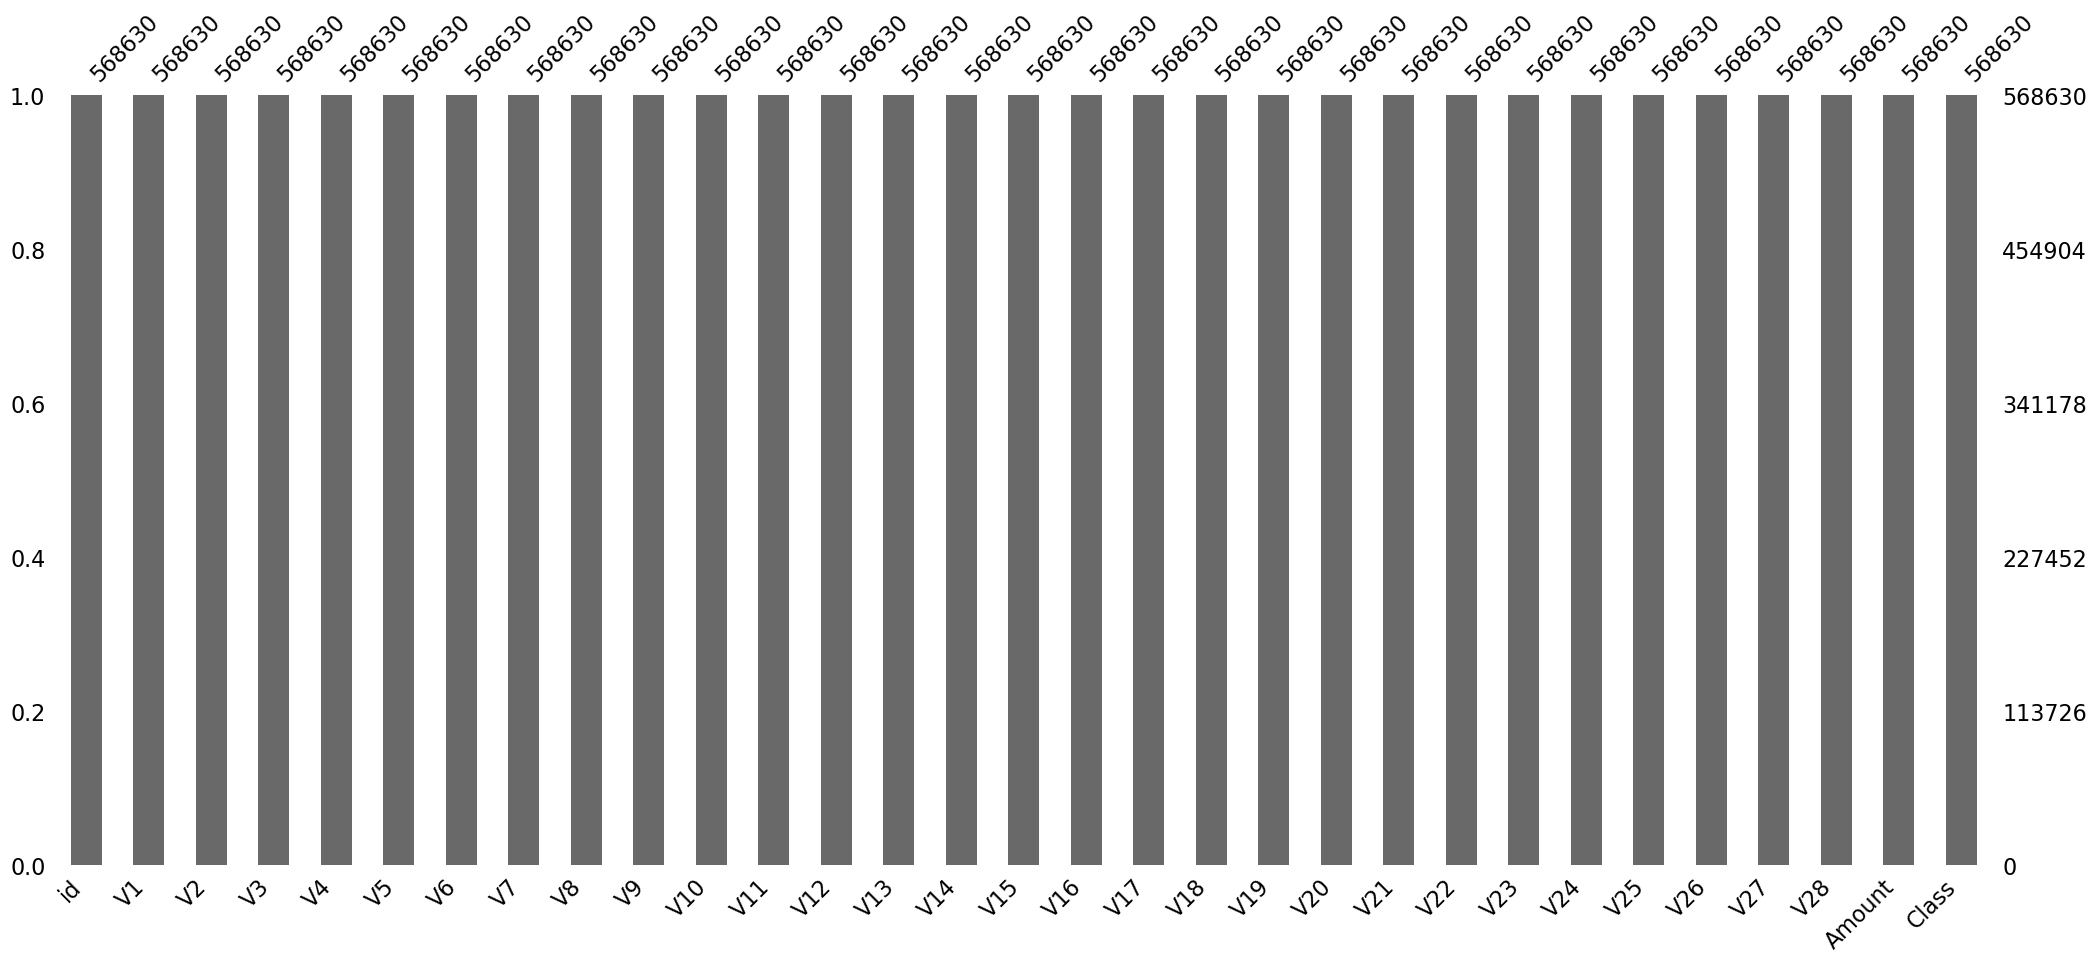

In [8]:
msno.bar(df)

<Axes: >

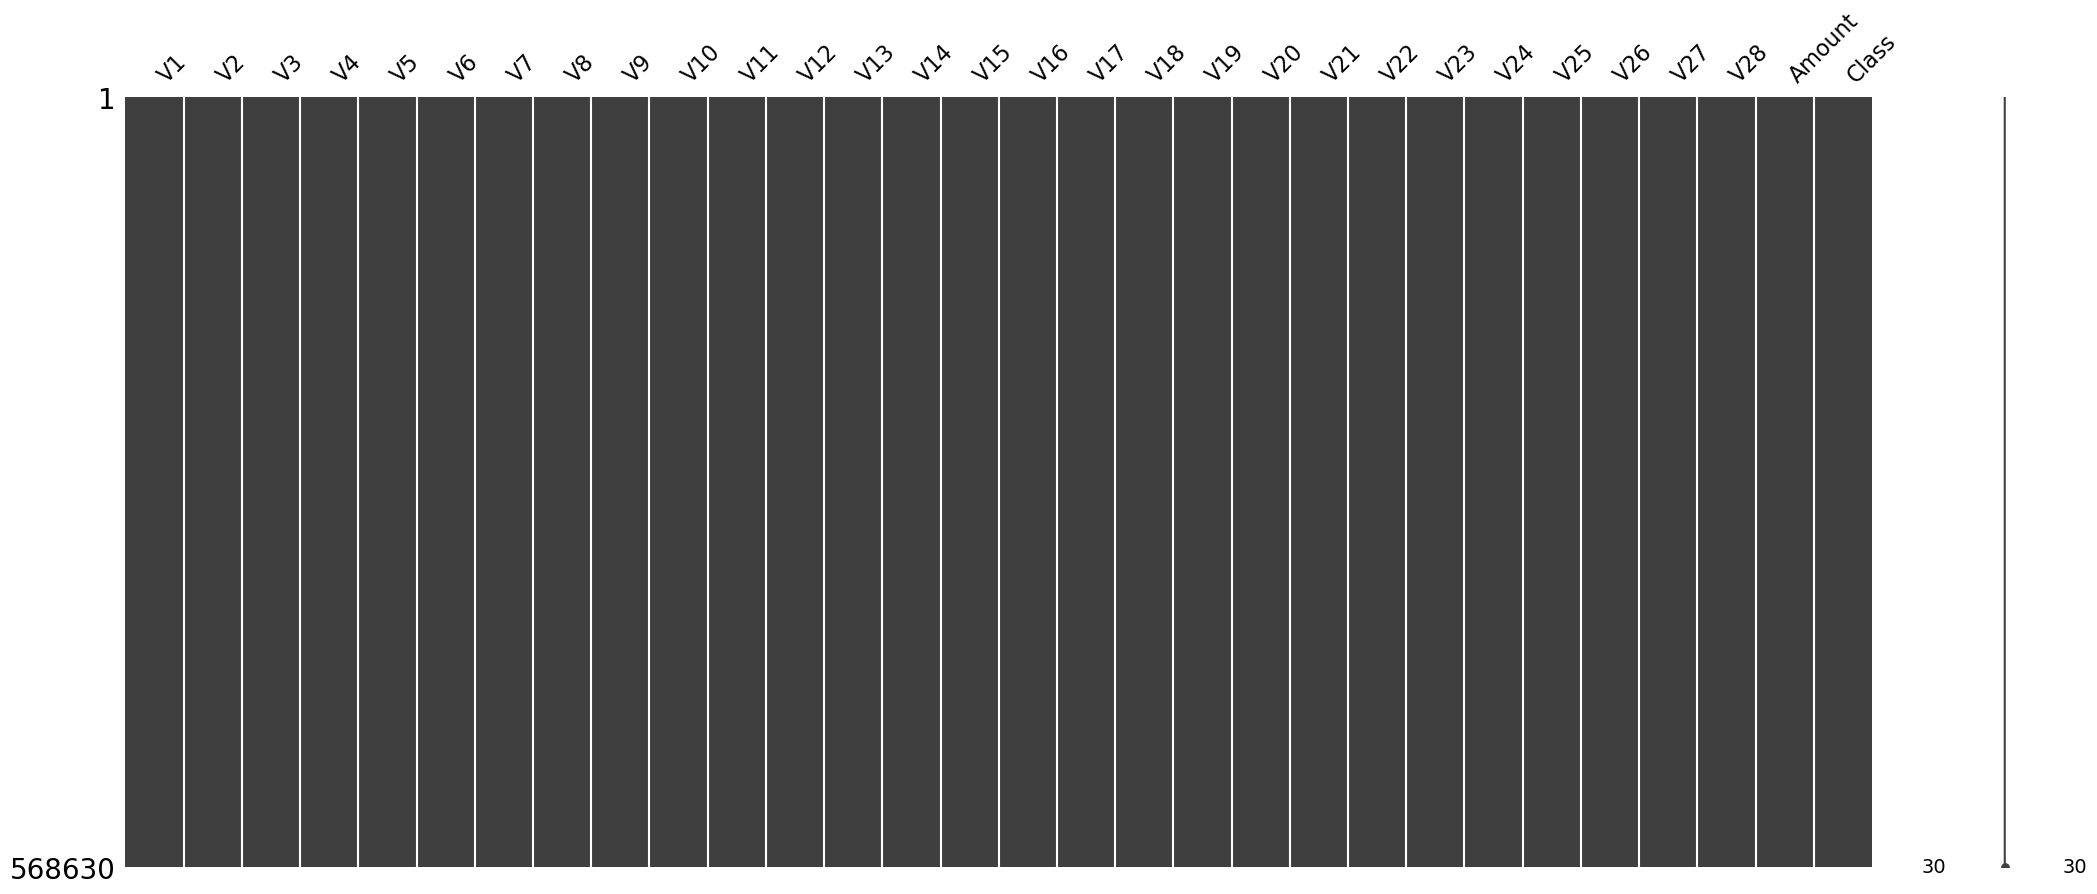

In [13]:
msno.matrix(df)

C:\Users\Mr CISSE\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\Mr CISSE\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

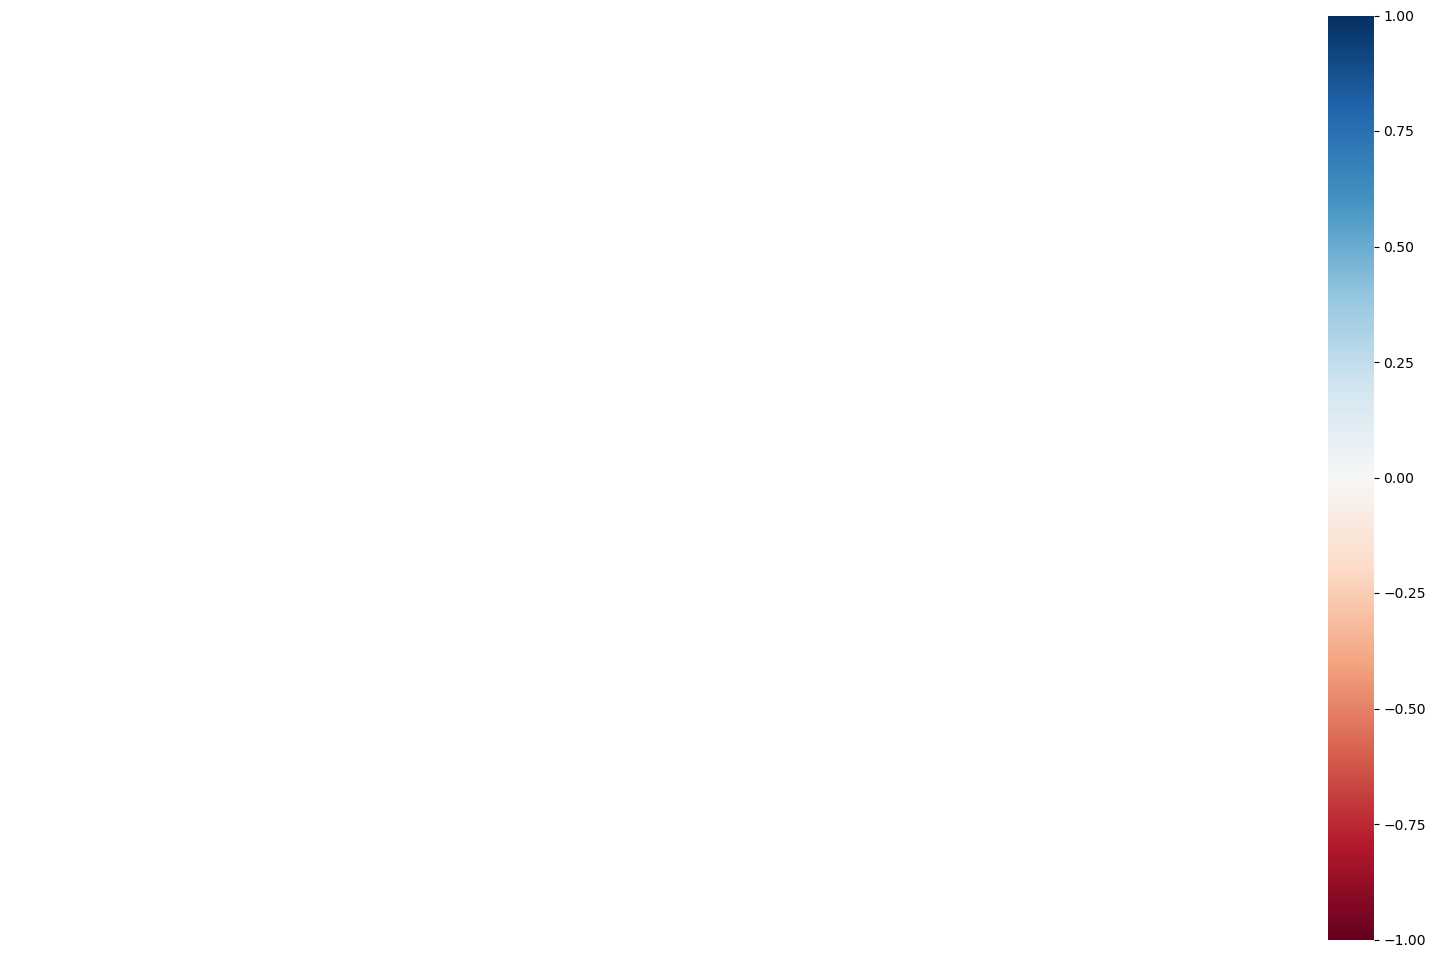

In [50]:
#matrix_coor = df.corr()
msno.heatmap(df)

### test de nomormalité

In [20]:
# Initialisation du DataFrame pour les résultats des tests de normalité
normality_df = pd.DataFrame(columns=['Variable', 'P-value', 'Normality'])

# Boucle pour calculer les tests de normalité pour chaque variable
for var in df.columns:
    stat, p = shapiro(df[var])
    normality = 'Normal' if p > 0.05 else 'Not Normal'
    df1 = pd.DataFrame({'Variable': [var], 'P-value': [p], 'Normality': [normality]})
    normality_df = pd.concat([df1,normality], ignore_index=True)
# Affichage du DataFrame des résultats des tests de normalité
print(normality_df)


C:\Users\Mr CISSE\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 568630.
  res = hypotest_fun_out(*samples, **kwds)


TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid

In [21]:

# Initialisation du DataFrame pour stocker les résultats
normality_df = pd.DataFrame(columns=['Variable', 'P-value', 'Normality'])

# Boucle pour calculer les tests de normalité pour chaque variable
for var in df.columns:
    stat, p = shapiro(df[var])
    normality = 'Normal' if p > 0.05 else 'Not Normal'
    
    # Création d'une nouvelle ligne sous forme de DataFrame
    new_row = pd.DataFrame([[var, p, normality]], columns=['Variable', 'P-value', 'Normality'])
    
    # Utilisation de pd.concat() pour ajouter la nouvelle ligne
    normality_df = pd.concat([normality_df, new_row], ignore_index=True)

# Affichage du DataFrame des résultats des tests de normalité
print(normality_df)


C:\Users\Mr CISSE\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 568630.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Mr CISSE\AppData\Local\Temp\ipykernel_12036\2954817674.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  normality_df = pd.concat([normality_df, new_row], ignore_index=True)


   Variable        P-value   Normality
0        V1  1.722230e-101  Not Normal
1        V2  1.986168e-162  Not Normal
2        V3   5.077844e-69  Not Normal
3        V4   2.457047e-62  Not Normal
4        V5  2.005216e-156  Not Normal
5        V6  3.217909e-120  Not Normal
6        V7  1.287301e-174  Not Normal
7        V8  2.043606e-197  Not Normal
8        V9  3.790567e-111  Not Normal
9       V10  2.130862e-143  Not Normal
10      V11   3.705134e-59  Not Normal
11      V12  1.283212e-102  Not Normal
12      V13   3.749114e-32  Not Normal
13      V14  4.839358e-119  Not Normal
14      V15   2.747216e-46  Not Normal
15      V16   3.556276e-97  Not Normal
16      V17  1.044113e-141  Not Normal
17      V18  1.437494e-102  Not Normal
18      V19   2.630040e-80  Not Normal
19      V20  1.815587e-181  Not Normal
20      V21  2.697915e-207  Not Normal
21      V22  8.055272e-175  Not Normal
22      V23  4.669341e-197  Not Normal
23      V24   4.591893e-77  Not Normal
24      V25  4.490822e-11

### Visualisation

In [42]:
X = df.iloc[:,:28]
label = df["Class"].value_counts()

In [43]:
label

Class
0    284315
1    284315
Name: count, dtype: int64

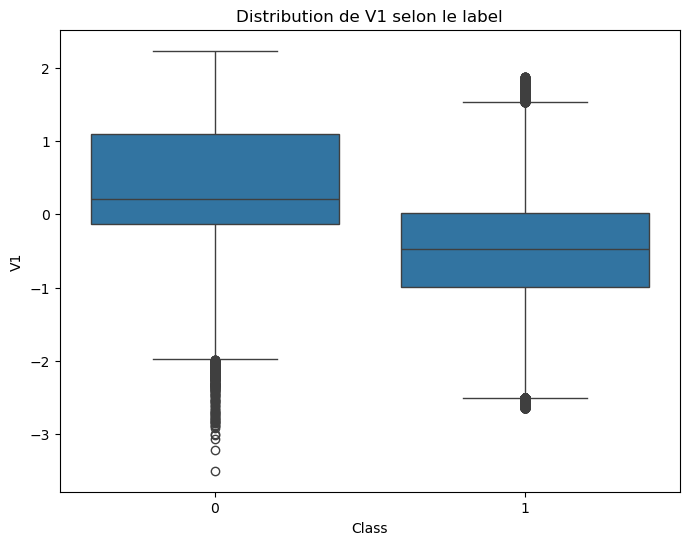

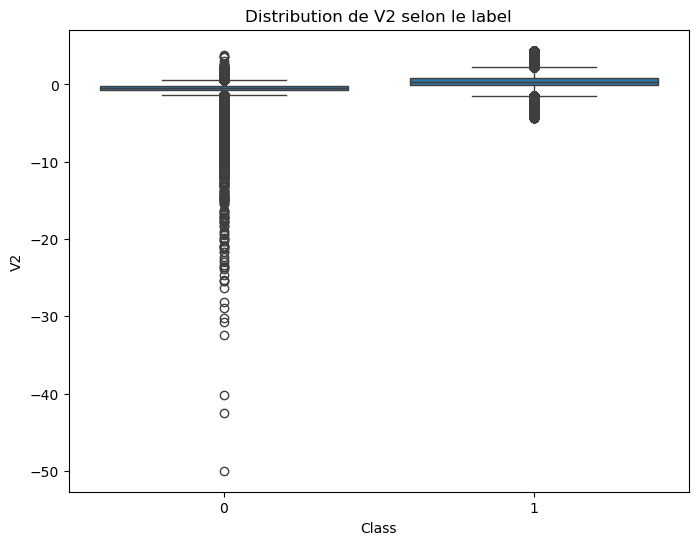

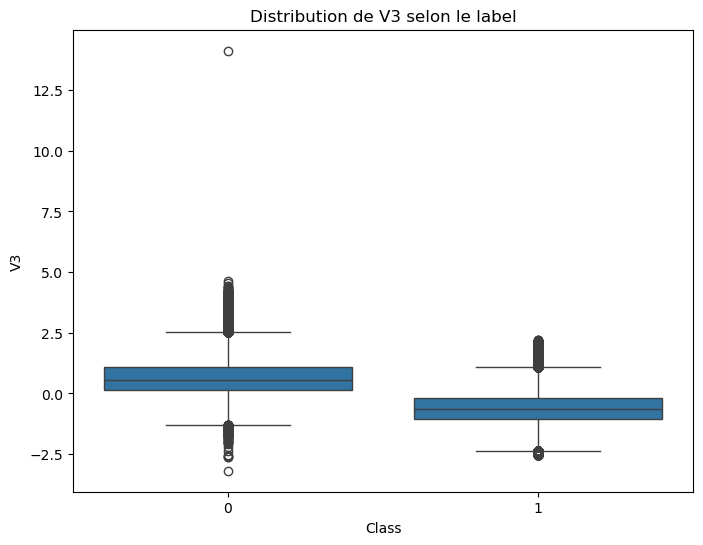

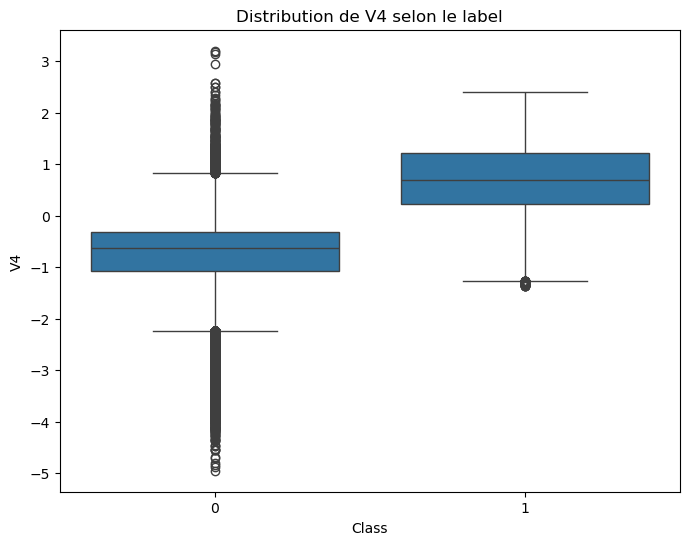

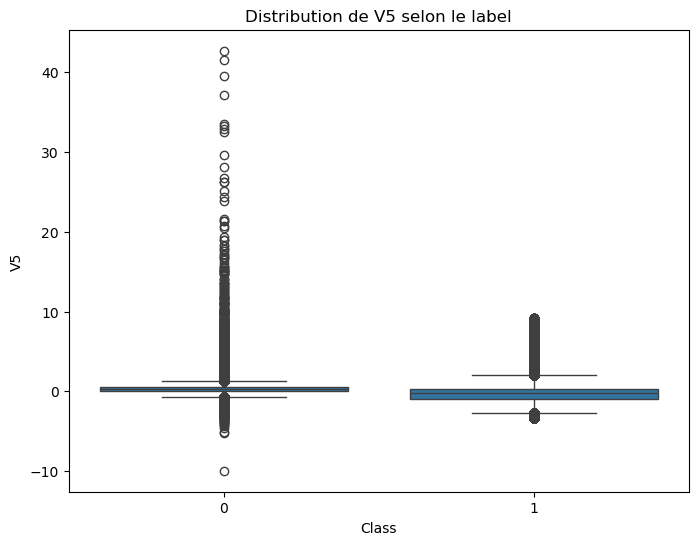

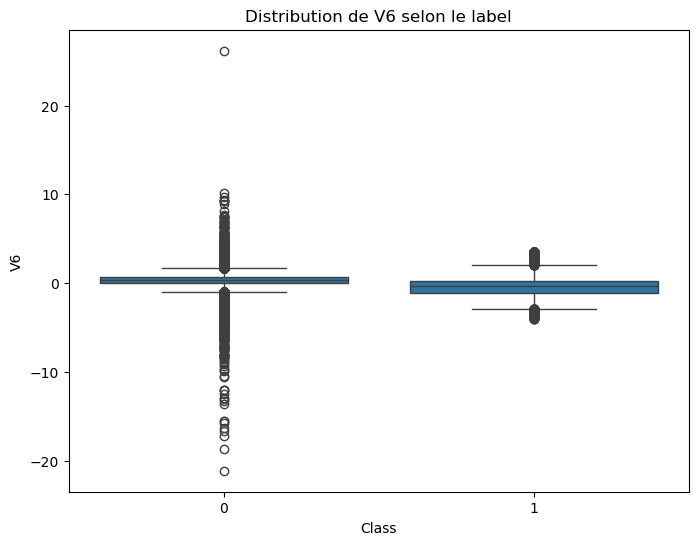

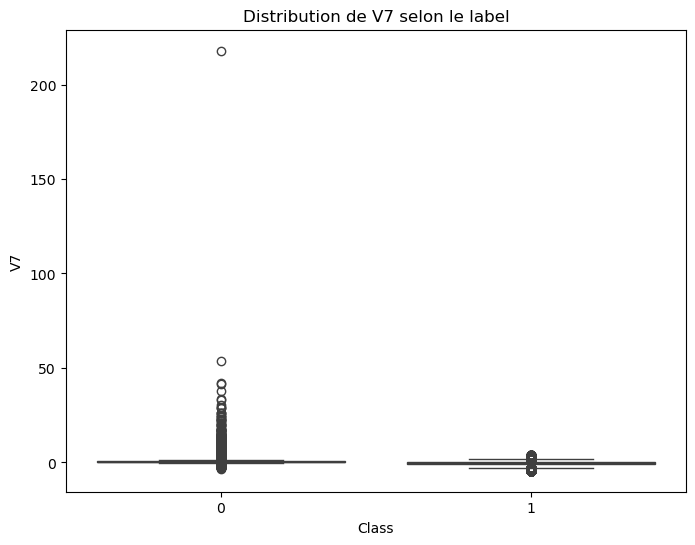

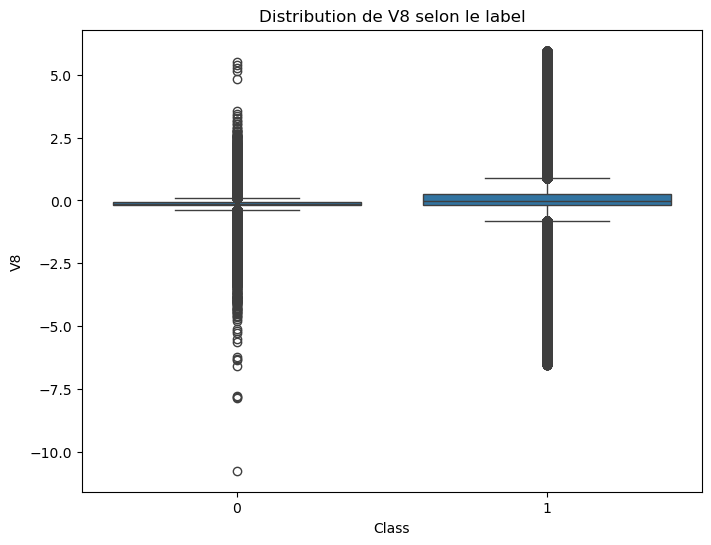

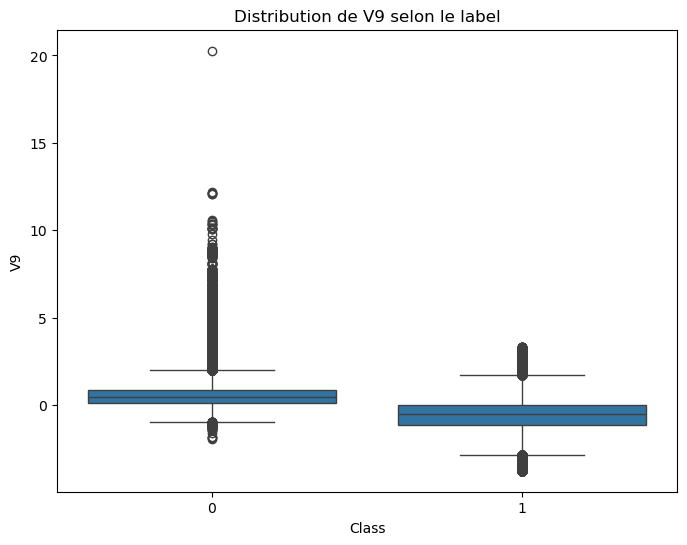

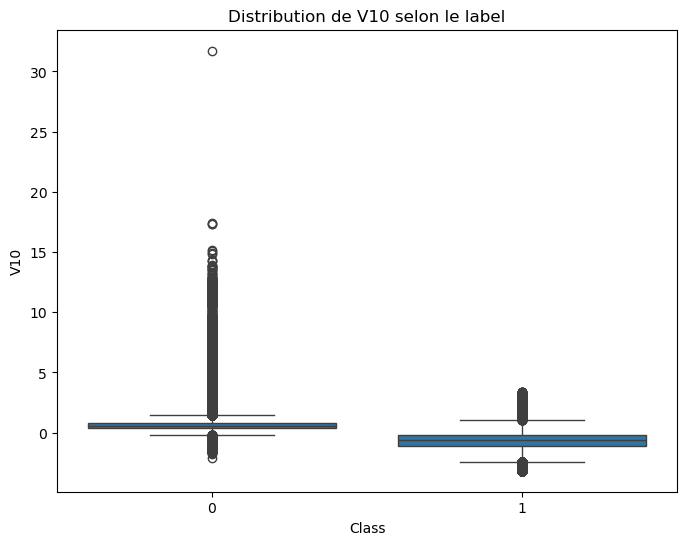

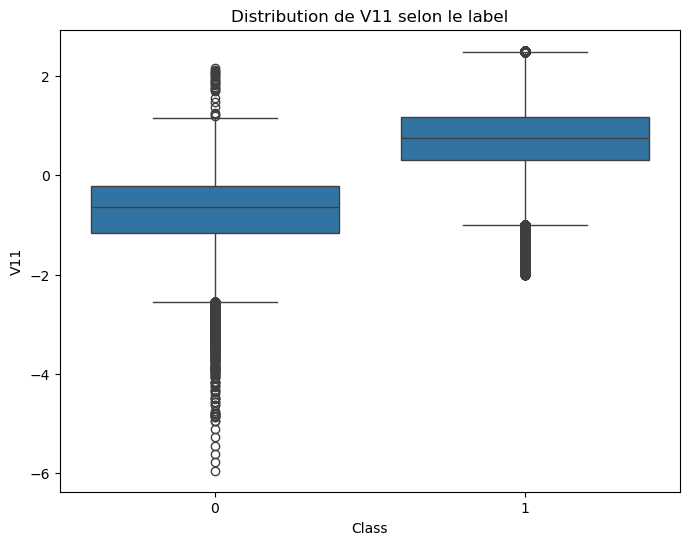

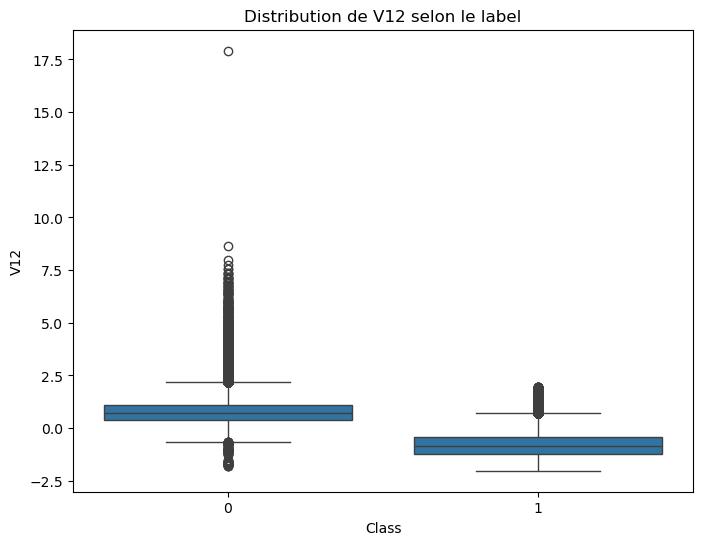

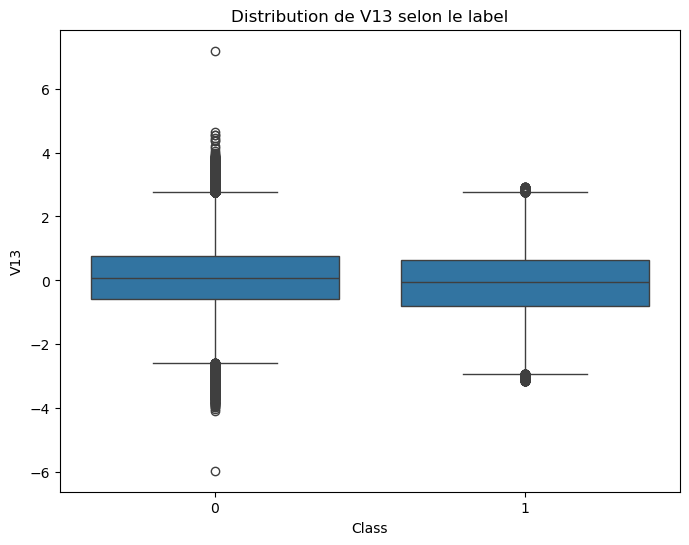

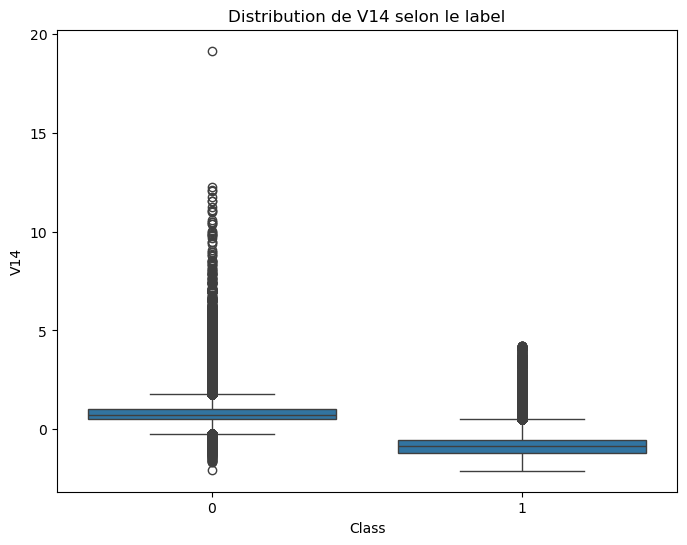

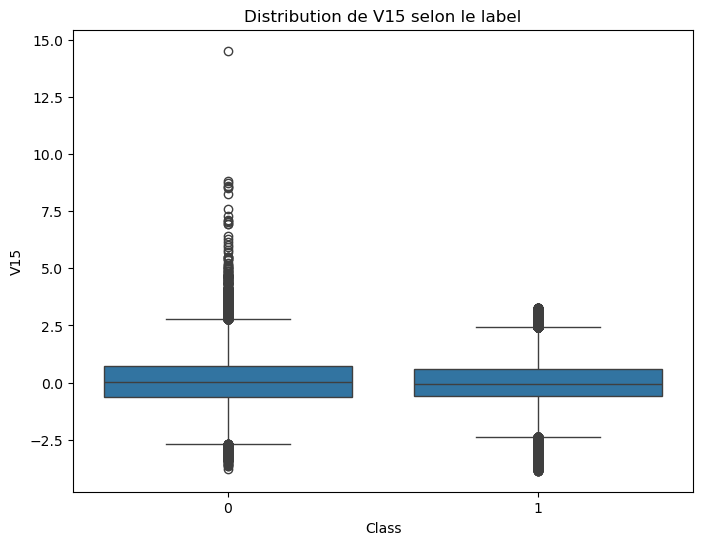

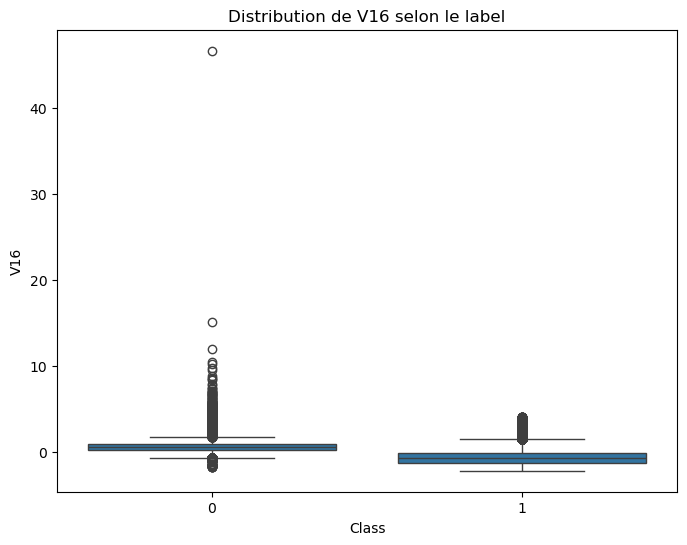

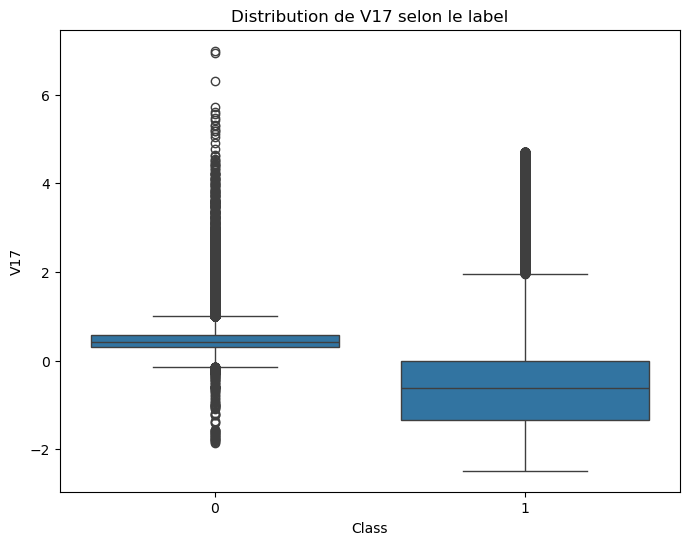

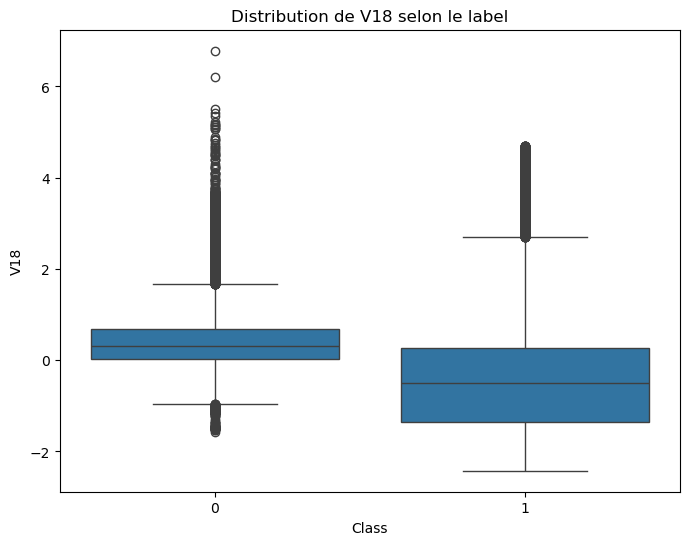

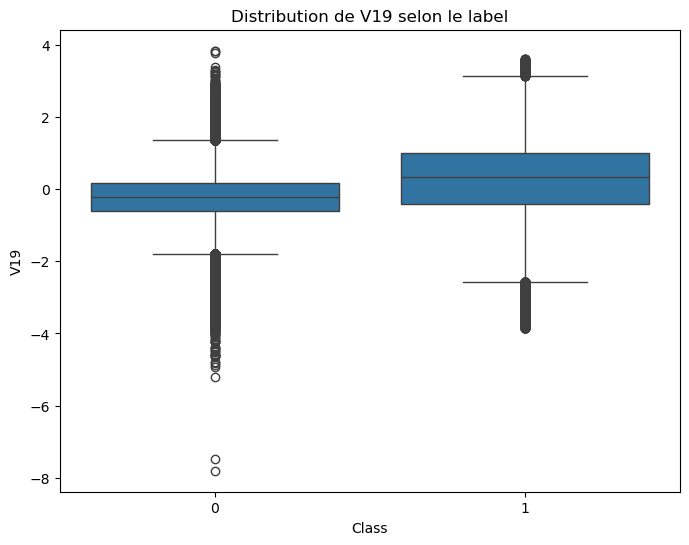

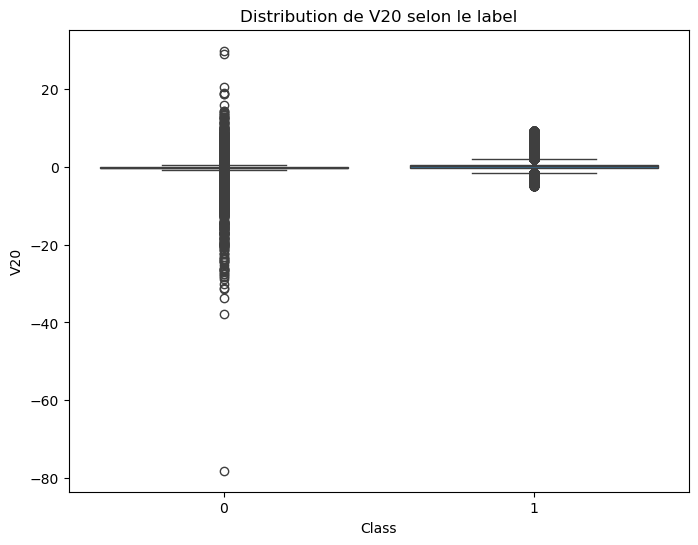

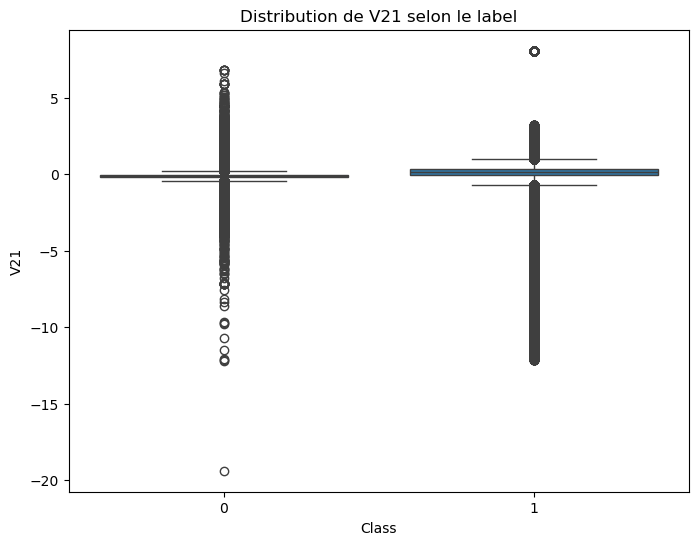

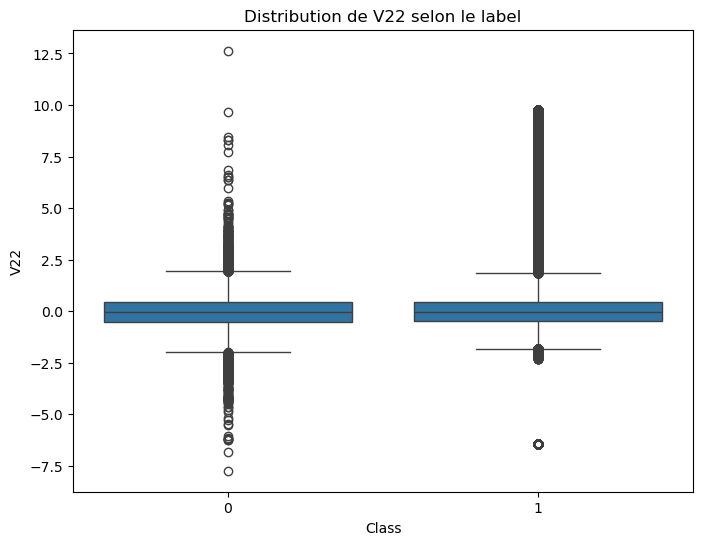

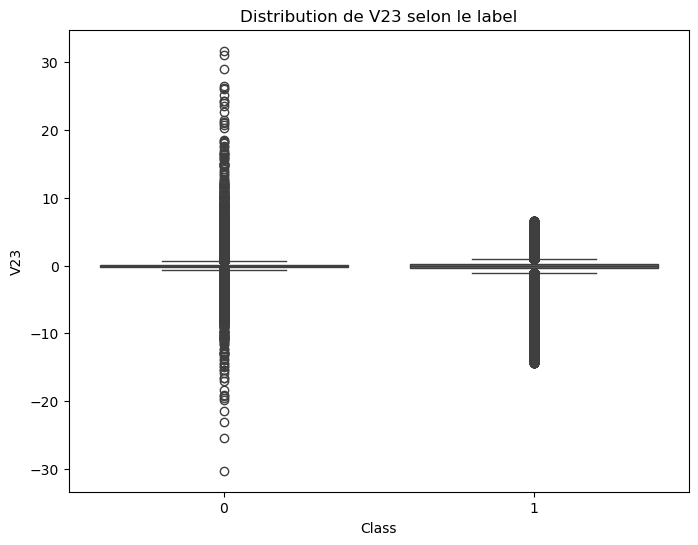

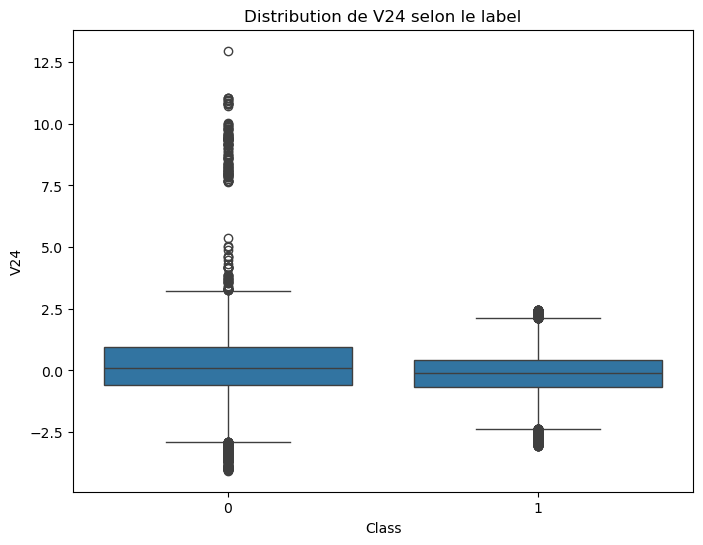

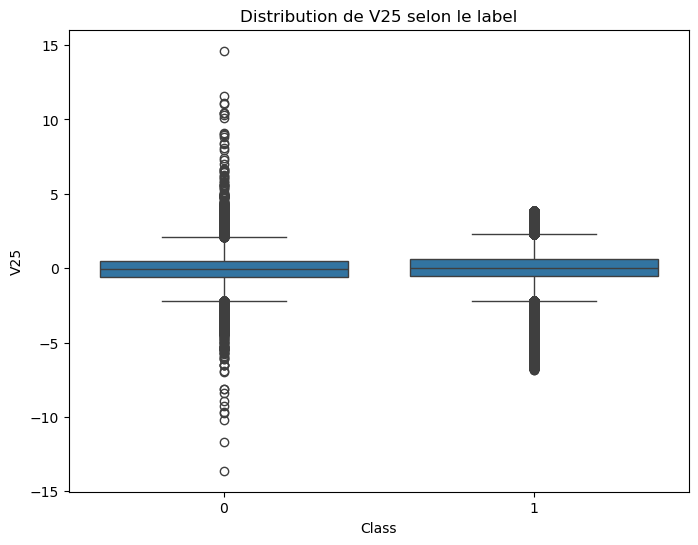

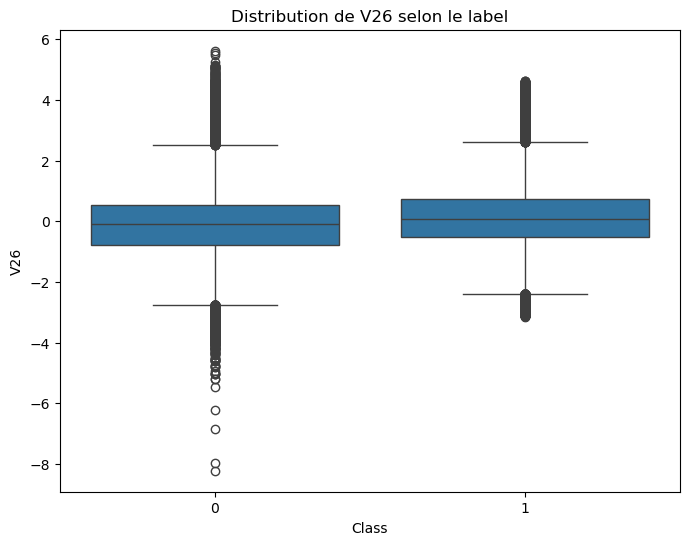

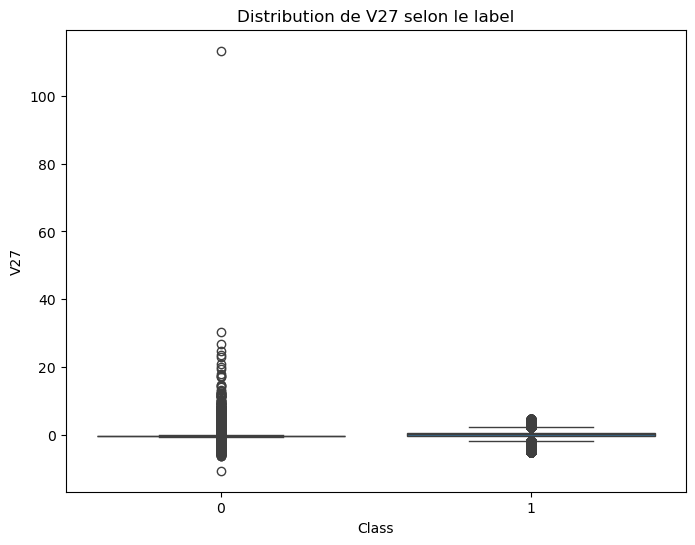

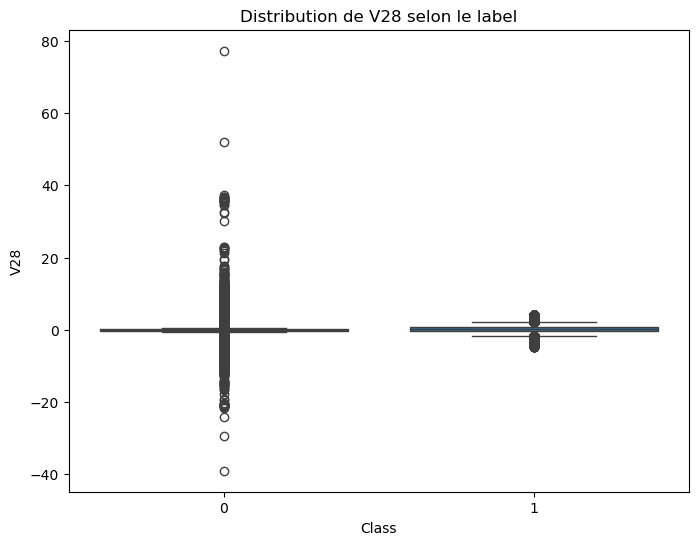

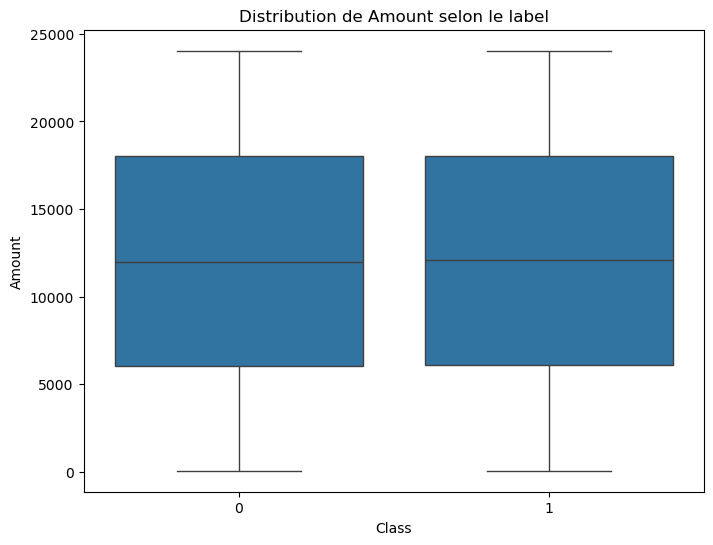

In [18]:
for column in df.columns[:-1]:  # Exclure la colonne du label si c'est la dernière
    plt.figure(figsize=(8,6))
    sns.boxplot(x=label, y=column, data=df)
    plt.title(f'Distribution de {column} selon le label')
    plt.show()

C:\Users\Mr CISSE\AppData\Local\Temp\ipykernel_19216\1795997085.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_class.index, y=correlation_with_class.values, palette='viridis')


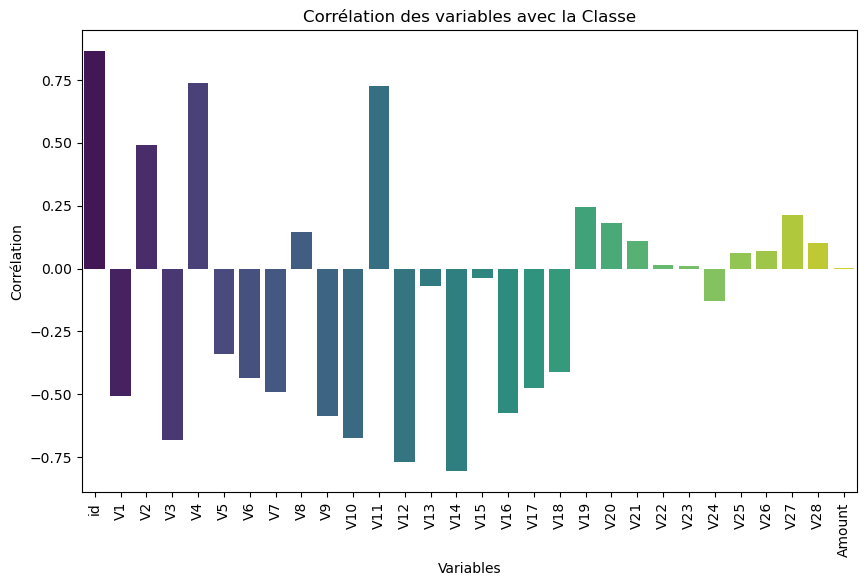

In [29]:
# Calculer la corrélation des variables avec la colonne 'Class'
correlation_with_class = df.corr()['Class'].drop('Class')  # On exclut la colonne 'Class'

# Créer un barplot avec seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_class.index, y=correlation_with_class.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Corrélation des variables avec la Classe')
plt.xlabel('Variables')
plt.ylabel('Corrélation')
plt.show()

### LE MODELE 

### REGRESSION LOGISTIQUE

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Séparer les features et la classe cible
X = df.drop(columns=['Class',"Amount","id"])
y = df['Class']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modèle de régression logistique
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_logreg = logreg.predict(X_test)

# Évaluation du modèle
print("Régression Logistique")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg)}")
print(classification_report(y_test, y_pred_logreg))


Régression Logistique
Accuracy: 0.9655311889981183
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     85149
           1       0.98      0.95      0.97     85440

    accuracy                           0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589



### ARBRES DE DECISION

In [47]:
from sklearn.tree import DecisionTreeClassifier

# Modèle d'arbre de décision
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_tree = tree_clf.predict(X_test)

# Évaluation du modèle
print("Arbre de Décision")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree)}")
print(classification_report(y_test, y_pred_tree))


Arbre de Décision
Accuracy: 0.9978720785044757
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



### RANDOMFOREST

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Modèle de Forêt Aléatoire
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_rf = rf_clf.predict(X_test)

# Évaluation du modèle
print("Forêt Aléatoire")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))


Forêt Aléatoire
Accuracy: 0.9998886211889395
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [55]:
confusion_matrix(y_test, y_pred_rf)

array([[85130,    19],
       [    0, 85440]], dtype=int64)

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from sklearn.ensemble import RandomForestClassifier

# Séparer les features et la classe cible
X = df.drop(columns=['Class'])  # Suppression des colonnes inutiles
y = df['Class']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraîner un modèle (par exemple, Random Forest ici)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prédictions sur les ensembles d'entraînement et de test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcul de la précision (accuracy)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calcul de l'erreur quadratique moyenne (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Affichage des résultats
print(f"Précision sur l'ensemble d'entraînement : {train_accuracy}")
print(f"Précision sur l'ensemble de test : {test_accuracy}")
print(f"Erreur quadratique moyenne (MSE) sur l'entraînement : {train_mse}")
print(f"Erreur quadratique moyenne (MSE) sur le test : {test_mse}")

# Si vous voulez aussi le log loss (pour des modèles probabilistes)
y_train_proba = model.predict_proba(X_train)
y_test_proba = model.predict_proba(X_test)
train_log_loss = log_loss(y_train, y_train_proba)
test_log_loss = log_loss(y_test, y_test_proba)

print(f"Log Loss sur l'entraînement : {train_log_loss}")
print(f"Log Loss sur le test : {test_log_loss}")


Précision sur l'ensemble d'entraînement : 1.0
Précision sur l'ensemble de test : 0.9998886211889395
Erreur quadratique moyenne (MSE) sur l'entraînement : 0.0
Erreur quadratique moyenne (MSE) sur le test : 0.00011137881106050214
Log Loss sur l'entraînement : 0.001333778053718673
Log Loss sur le test : 0.004342345457958024


In [56]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x: 'ArrayLike | Sequence[ArrayLike]', bins: 'int | Sequence[float] | str | None' = None, range: 'tuple[float, float] | None' = None, density: 'bool' = False, weights: 'ArrayLike | None' = None, cumulative: 'bool | float' = False, bottom: 'ArrayLike | float | None' = None, histtype: "Literal['bar', 'barstacked', 'step', 'stepfilled']" = 'bar', align: "Literal['left', 'mid', 'right']" = 'mid', orientation: "Literal['vertical', 'horizontal']" = 'vertical', rwidth: 'float | None' = None, log: 'bool' = False, color: 'ColorType | Sequence[ColorType] | None' = None, label: 'str | Sequence[str] | None' = None, stacked: 'bool' = False, *, data=None, **kwargs) -> 'tuple[np.ndarray | list[np.ndarray], np.ndarray, BarContainer | Polygon | list[BarContainer | Polygon]]'
    Compute and plot a histogram.

    This method uses `numpy.histogram` to bin the data in *x* and count the
    number of values in each bin, then draws the distribution ei